In [1]:
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
import matplotlib.dates as mdates
import numpy as np

In [2]:
raw_data = pd.read_csv('covid_19_indonesia_time_series_all - covid_19_indonesia_time_series_all.csv')
raw_data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [3]:
cleaned_data = raw_data[raw_data["Total Active Cases"] >= 0]

In [4]:
cleaned_data.to_csv("Cleaned_data.csv")

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21382 entries, 2 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21382 non-null  object 
 1   Location ISO Code            21382 non-null  object 
 2   Location                     21382 non-null  object 
 3   New Cases                    21382 non-null  int64  
 4   New Deaths                   21382 non-null  int64  
 5   New Recovered                21382 non-null  int64  
 6   New Active Cases             21382 non-null  int64  
 7   Total Cases                  21382 non-null  int64  
 8   Total Deaths                 21382 non-null  int64  
 9   Total Recovered              21382 non-null  int64  
 10  Total Active Cases           21382 non-null  int64  
 11  Location Level               21382 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [6]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

<ipython-input-6-4df4df2cbae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])


In [7]:
matplotlib.rcParams['figure.figsize'] = [12,6]

In [8]:
jakarta_data = cleaned_data[cleaned_data["Location"] == "DKI Jakarta"]
jakarta_dates = jakarta_data["Date"]

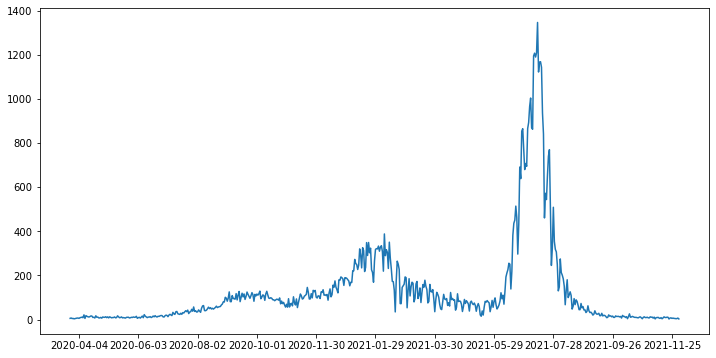

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
plt.plot(jakarta_dates, jakarta_data["New Cases per Million"])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))   # x axis tick every 60 days
plt.show()

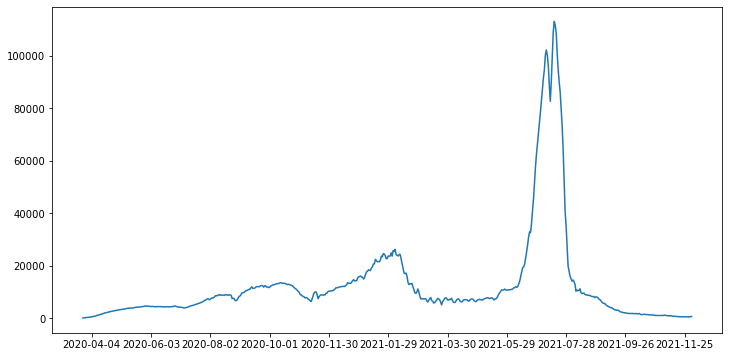

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
plt.plot(jakarta_dates, jakarta_data["Total Active Cases"])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))   # x axis tick every 60 days
plt.show()

In [11]:
jakarta_data["Total Active Cases"].describe()


count       617.000000
mean      12476.964344
std       18513.005479
min          31.000000
25%        4242.000000
50%        7609.000000
75%       12096.000000
max      113086.000000
Name: Total Active Cases, dtype: float64

In [12]:
jakarta_data["New Cases per Million"].describe()

count     617.000000
mean      129.099757
std       204.086267
min         2.400000
25%        15.490000
50%        72.380000
75%       128.060000
max      1348.130000
Name: New Cases per Million, dtype: float64

In [13]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)  
# plt.plot(by_month["Date"], by_month["Total Active Cases"])
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))   # x axis tick every 60 days
# plt.show()

In [14]:
# Calculate case rate for provinces over 5 million
five_million_data = cleaned_data[cleaned_data["Population"] >= 5000000]
five_million_data["Total Cases per Million"].mean()

5609.565752903714

In [15]:
# Group data by month and year
# def month_year()
# jakarta_data.groupby()
# How to aggregate by month?
# by_month = jakarta_data.groupby(jakarta_data["Date"].dt.month)["Total Active Cases"].mean()

                   New Cases                                                   \
                       count         mean          std   min      25%     50%   
Population Density                                                              
8.59                   614.0    58.444625   105.467402   0.0     2.00    14.0   
11.08                  616.0    37.951299    70.769390   0.0     4.00    14.0   
13.60                  621.0    55.299517    96.126700   0.0     7.00    29.0   
16.74                  592.0    76.986486    89.099954   0.0    15.00    50.0   
27.52                  629.0   251.581876   384.117541   0.0    20.00   127.0   
36.81                  611.0    67.980360   114.892535   0.0     5.00    25.0   
39.37                  620.0    23.527419    43.785542   0.0     1.00     8.5   
40.89                  594.0    20.370370    40.562456   0.0     2.00     7.0   
47.79                  617.0    76.423015   167.912376   0.0     2.00    17.0   
69.23                  633.0

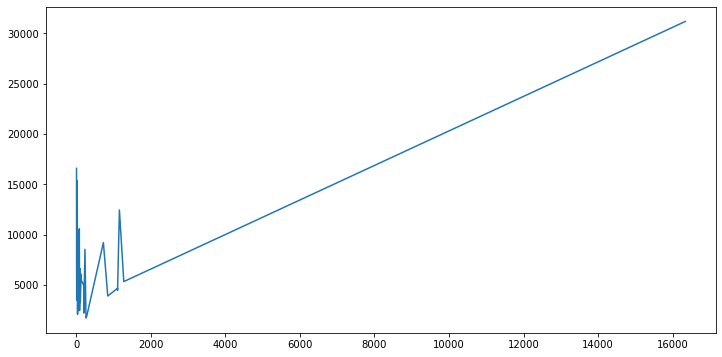

In [16]:
# Plot population density agaisnt average case rate
aggregated_density = cleaned_data.groupby("Population Density")
print(aggregated_density.describe())
print(aggregated_density["Total Cases per Million"].mean())
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
# plt.plot(aggregated_density["Population Density"], aggregated_density["Total Cases per Million"].mean())
plt.plot(aggregated_density["Total Cases per Million"].mean())
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))   # x axis tick every 60 days
plt.show()
